In [54]:
import os
from converter import convert_lst_to_csv
# Позволяет использовать измененные модули без перезагрузки ядра
%load_ext autoreload
%autoreload 2

PATH_HDD = "/media/oplora/HDD/ASUS/ascii/1min_ascii/" # Путь к сырым данным с шагом 1 минута
PATH_STORAGE = os.getcwd() + '/Data/'
PATH_CONV_1MIN = PATH_STORAGE+'original_data/converted/'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
# Выделяем из папки файлы с расширением *.asc
ascii_files_in_dir = [file for file in os.listdir(PATH_HDD) if file[-3:] == 'asc']

from converter import convert_asc_to_csv

#os.mkdir(dir_to_save)

# Конвертация каждого *.asc файла в исходной папке
for file in ascii_files_in_dir:
    convert_asc_to_csv(PATH_HDD+file,
                       PATH_CONV_1MIN + file.replace(".asc", ".csv" ),
                       header = True)

# Создание данных за год 
convert_asc_to_csv(PATH_HDD+'202301_wind_mag_1min.asc', 
                   PATH_CONV_1MIN + 'full_data.csv', header=True)
for file in ascii_files_in_dir[1:]:
    convert_asc_to_csv(PATH_HDD+file,
                       PATH_CONV_1MIN + 'full_data.csv',
                       mode_='a')    


In [56]:
import pandas as pd

df1 = pd.read_csv(PATH_STORAGE+'output_file.csv', na_values=-1e+31)
df = pd.read_csv(PATH_CONV_1MIN+'full_data.csv', na_values=-1e+31)

/tmp/ipykernel_11254/1894372260.py:4: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_CONV_1MIN+'full_data.csv', na_values=-1e+31)


<Axes: >

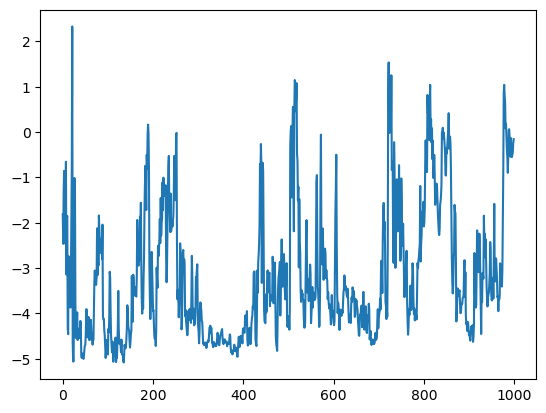

In [58]:
df['Bx_GSE'][:1000].plot()